# House Price Prediction - 02 - EDA - Correlation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(rc={"figure.figsize":(16, 9)})

In [3]:
df_train = pd.read_csv("data/train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Correlations

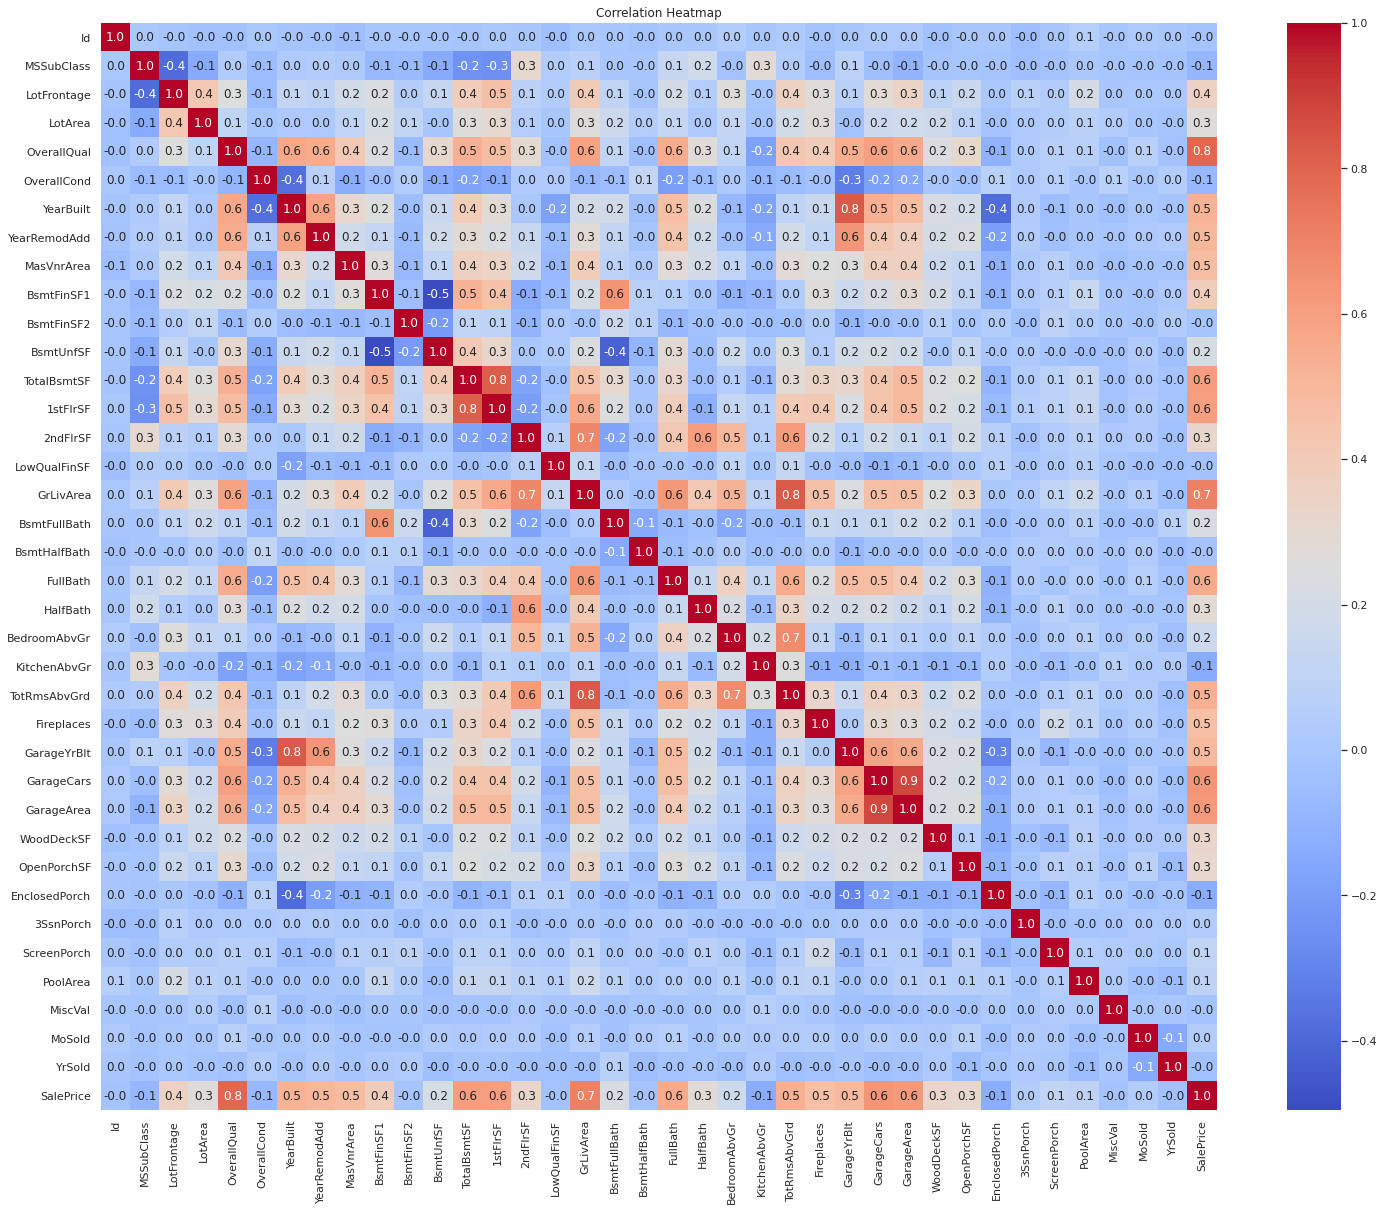

In [6]:
sns.set(rc={"figure.figsize":(25, 20)})
plot=sns.heatmap(df_train.corr(), annot=True, fmt = ".1f", cmap= 'coolwarm')
plt.title("Correlation Heatmap")
plot.figure.savefig("plots/corr_heatmap.png", bbox_inches='tight')

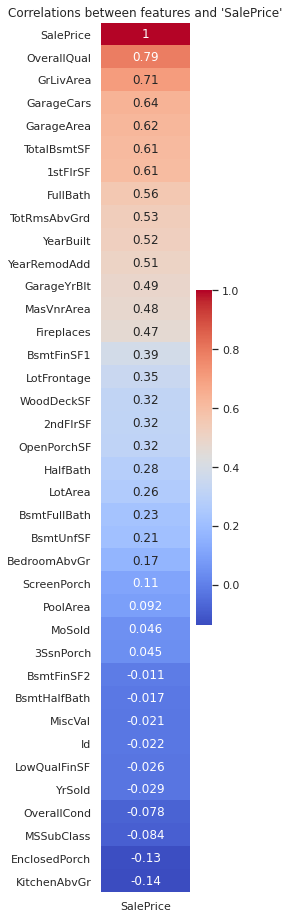

In [19]:
sns.set(rc={"figure.figsize":(2, 16)})
plot = sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap= 'coolwarm')
plt.title("Correlations between features and 'SalePrice'")
plot.figure.savefig("plots/corr_heatmap_SalePrice.png", bbox_inches='tight')

In [8]:
top_five_features = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).index[:6]
top_ten_features = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).index[:11]

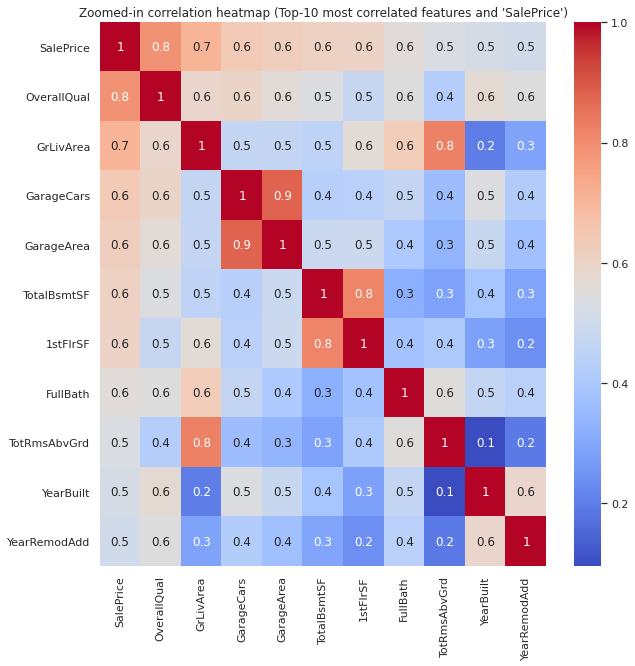

In [20]:
sns.set(rc={"figure.figsize":(10, 10)})
plot=sns.heatmap(df_train[top_ten_features].corr(), annot=True, fmt = ".1g", cmap= 'coolwarm')
plt.title("Zoomed-in correlation heatmap (Top-10 most correlated features and 'SalePrice')")
plot.figure.savefig("plots/corr_heatmap_top10.png", bbox_inches='tight')

#### Pairplot of the top five most correlated features to SalePrice

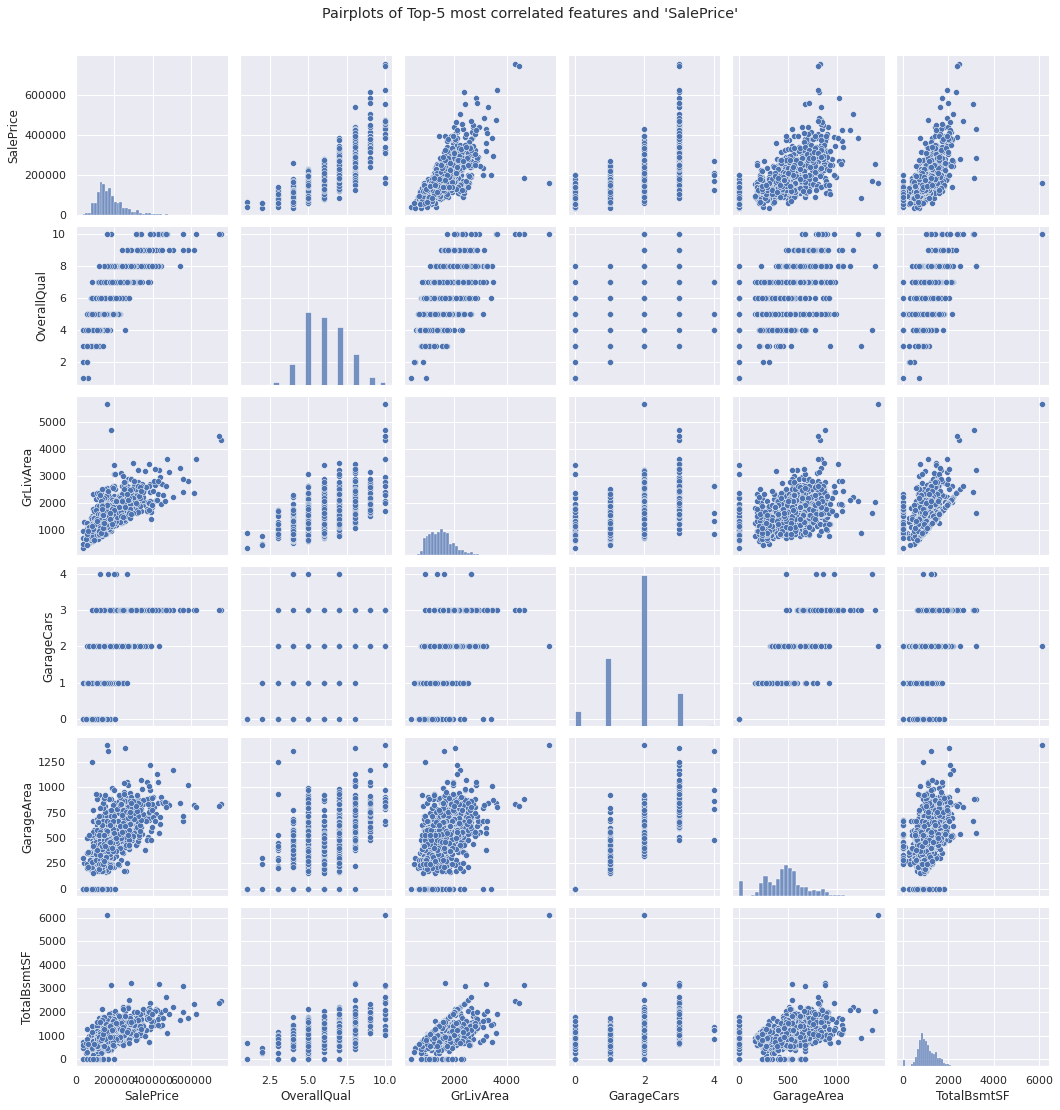

In [30]:
plot = sns.pairplot(df_train[top_five_features])
plt.suptitle("Pairplots of Top-5 most correlated features and 'SalePrice'", y=1.03)
plot.savefig("plots/pairplot_top5.png", bbox_inches='tight', dpi=72)

#### Correlations in-between features

In [11]:
df_train_corr = df_train.corr().reset_index()

In [12]:
df_train_corr_sorted = pd.melt(df_train_corr,id_vars='index').sort_values(by=['value'], ascending=False)

In [13]:
df_train_corr_sorted = df_train_corr_sorted[df_train_corr_sorted.value != 1.0]

In [14]:
df_train_corr_sorted.drop_duplicates(subset=['value'], keep='first', inplace=True)

In [15]:
df_train_corr_sorted = df_train_corr_sorted[
    (~df_train_corr_sorted['index'].isin(["SalePrice"])) &
    (~df_train_corr_sorted['variable'].isin(["SalePrice"]))]

In [16]:
df_train_corr_sorted = df_train_corr_sorted.set_index('index')

In [17]:
df_train_corr_sorted.head(10)

,variable,value
index,,
GarageCars,GarageArea,0.882475
YearBuilt,GarageYrBlt,0.825667
TotRmsAbvGrd,GrLivArea,0.825489
TotalBsmtSF,1stFlrSF,0.819530
2ndFlrSF,GrLivArea,0.687501
BedroomAbvGr,TotRmsAbvGrd,0.676620
BsmtFullBath,BsmtFinSF1,0.649212
YearRemodAdd,GarageYrBlt,0.642277
GrLivArea,FullBath,0.630012


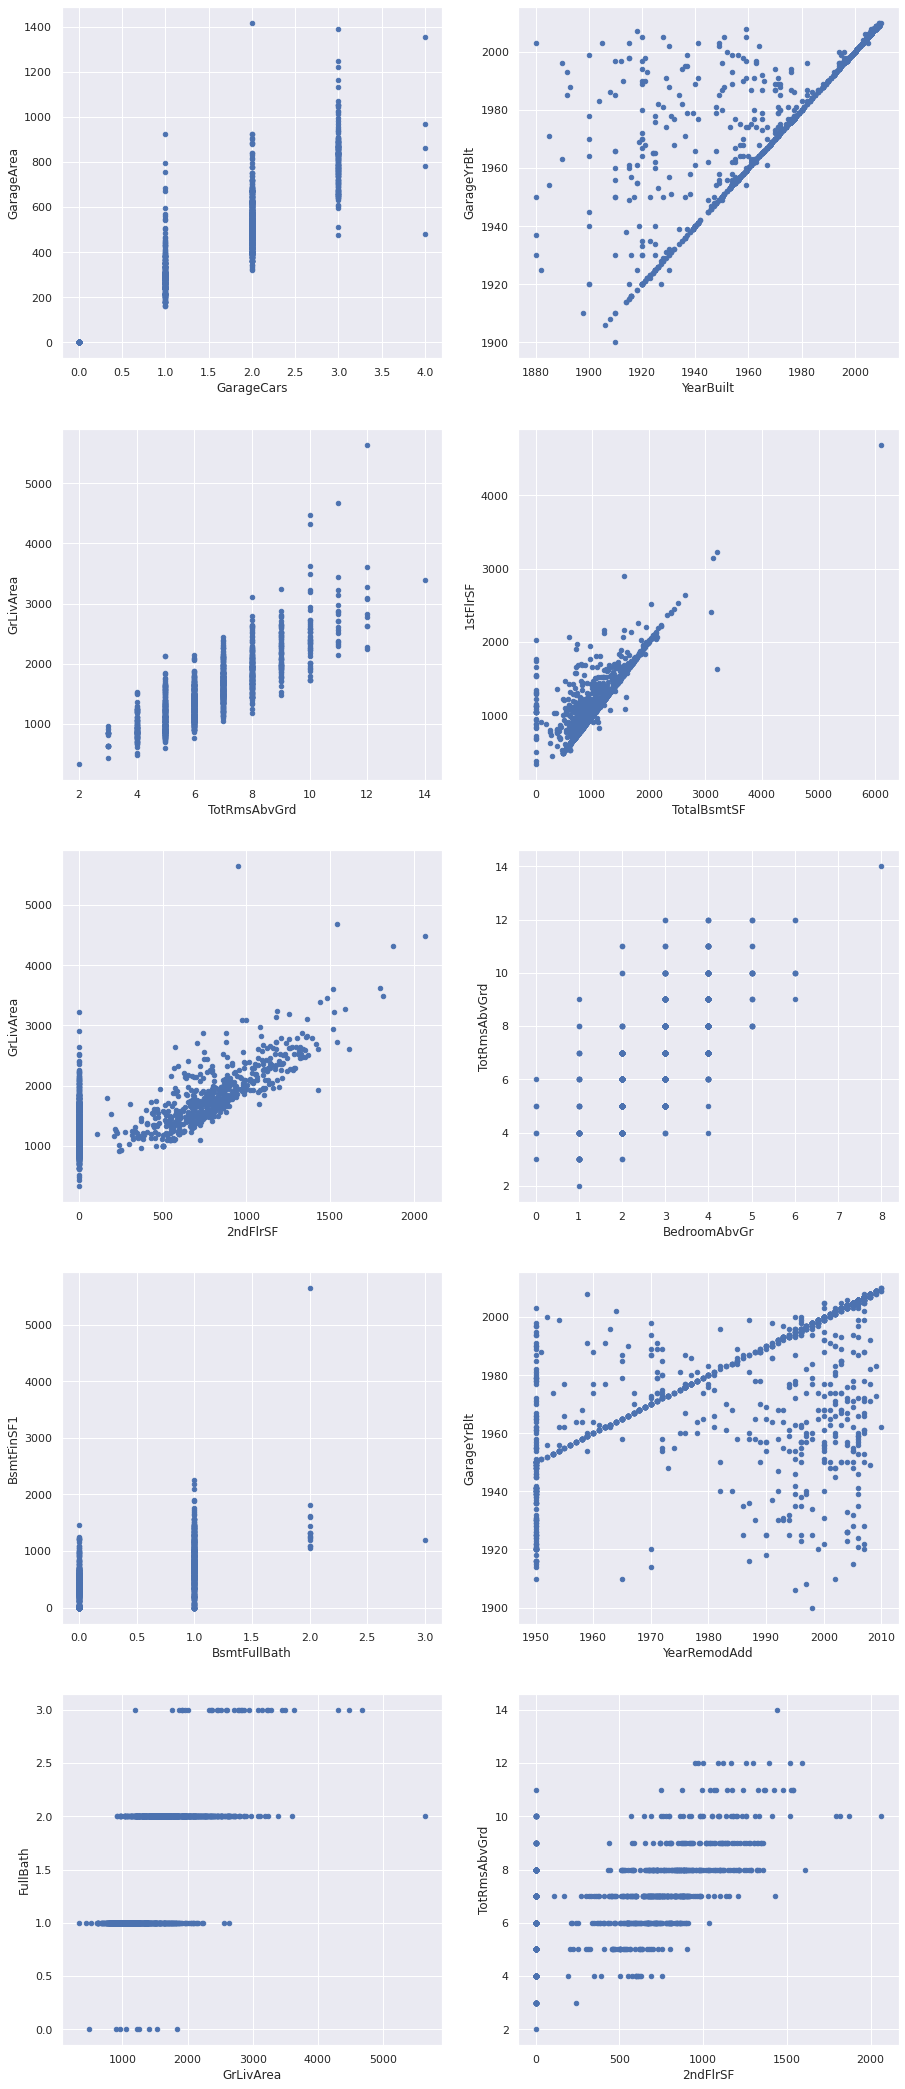

In [27]:
fig, axes = plt.subplots(5, 2, figsize=(15,37.5))
fig.subplots_adjust(hspace=0.2)

x = y = 0
for i in range(10):
    var1 = df_train_corr_sorted.index[i]
    var2 = df_train_corr_sorted.variable[i]
    data = pd.concat([df_train[var1], df_train[var2]], axis = 1)
    data.plot.scatter(x=var1, y=var2, c='b', ax=axes[x][y])
    y += 1
    if y == 2:
        y = 0
        x += 1
fig.savefig("plots/correlations_features.png", bbox_inches='tight')